# Celulární automaty

Zkusme si dnes pohrát na cvičeních s celulárnímí automaty a jinými technikami používanými v umělém životě. 

Celulární automaty jsou (typicky) 1D nebo 2D mřížky, kde každé políčko může mít jednu z $k$ barev. V nejjednodušším případě jsou barvy jen dvě. Potom se často říká, že na některých políčkách je organismus a na jiných není. Na základě barvy políčka a jeho sousedů do dané vzdálenosti se potom definují pravidla pro změny barev políček. 

Cíle výzkumu celulárních automatů mohou být různé - od studia celulárních automatů jako takových, až po hledání pravidel, která umožňují modelování reálných systémů (např. šíření požáru, nebo pohyb aut na silnici).

111 -> 0
110 -> 1
101 -> 1
100 -> 0
011 -> 0
010 -> 0
001 -> 1
000 -> 1


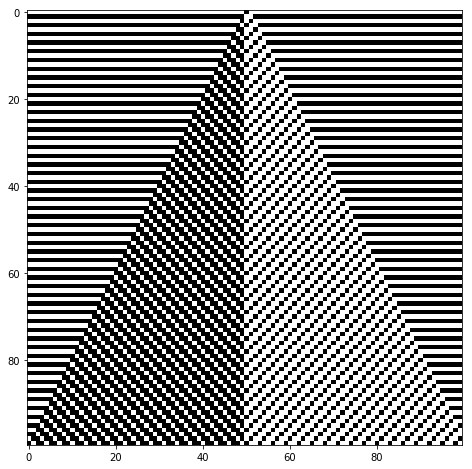

In [11]:
import matplotlib.pyplot as plt
import cellpylib as cpl

ca = cpl.init_simple(100)

rule_num = 0b01100011 #99

ca = cpl.evolve(ca, timesteps=100, apply_rule=lambda n, c, s: cpl.nks_rule(n, rule_num))

#vypiseme si, co nase pravidlo dela, jako tabulku
bin_rn = bin(rule_num)[2:]
bin_rn = '0'*(8-len(bin_rn)) + bin_rn
for i, c in enumerate(bin_rn):
    s = bin(7-i)[2:]
    s = '0'*(3-len(s)) + s
    print(s, '->', c)

# cpl.plot pouziva matplotlib, muzeme tedy snadno specifikovat velikost obrazku
plt.figure(figsize=(12,8))
cpl.plot(ca)

## Cvičení

Zkuste si pohrát s nastavením pravidel tak, abyste našli automat, který vygeneruje zajímavé obrazce (šachovnici, rovné čáry, Sierpinskeho trojúhelník apod.). 

Uměli byste najít pravidlo, které povede k tomu, že celá řádka bude černá, pokud je na začátku více černých políček a bude bílá, pokud je to naopak? Uměli byste k tomu použít evoluční algoritmus?

# Convay's Game of Life

Game of Life je jedním z nejznámějších celulárních 2D automatů. Ve 2D automatech závisí nová hodnota každého políčka na všech okolních políčkách. V případě Game of Life jsou pravidla jednoduchá:
 1. živá buňka s méně než dvěma nebo více než třemi živými sousedy umírá
 2. živá buňka s dvěma nebo třemi živými sousedy přežívá
 3. mrtvá buňka s právě třemi živými sousedy ožívá
 
Na základě těchto velmi jednoduchých pravidel se dají implementovat docela zajímavé organismy, které se množí, pohybují apod.

V Pythonu si můžeme vyzkoušet Game of Life díky knihovně seagull (podle zkratky jména hry - CGoL).

2019-05-12 23:53:19.349 | INFO     | seagull.simulator:compute_statistics:112 - Computing simulation statistics...
2019-05-12 23:53:19.357 | INFO     | seagull.simulator:animate:153 - Rendering animation...


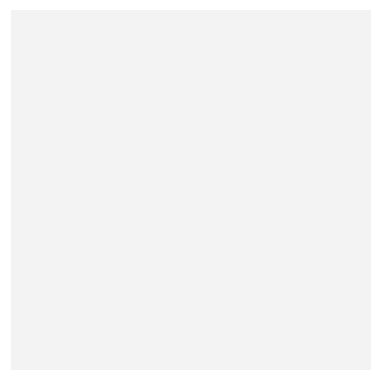

In [22]:
plt.rcParams["animation.html"] = "jshtml"

import seagull as sg
import seagull.lifeforms as lf

# Initialize board
board = sg.Board(size=(40,40))

# Add three Pulsar lifeforms in various locations
board.add(lf.Pulsar(), loc=(1,1))
board.add(lf.Pulsar(), loc=(1,22))
board.add(lf.Pulsar(), loc=(20,1))
board.add(lf.Pulsar(), loc=(20,22))

# Simulate board
sim = sg.Simulator(board)
sim.run(sg.rules.conway_classic, iters=100)

anim = sim.animate()

In [24]:
anim

## Cvičení

Vyzkoušejte si i vlastní organismy v Game of Life, najdete nějaké, které se chovají zajímavě? (vlastní organismus můžete definovat pomocí lf.Custom, jako parametr zadáte 2D pole 0 a 1).

# Langton's Ant

Langtonův mravenec představuje další velmi jednoduchou simulaci života. Jde o mravence, který se pohybuje na mřížce se dvěma barvami. Při každém pohybu přebarví svoje políčko na opačnou barvu. V závislosti na počáteční barvě políčka se potom rozhoduje, jestli má jít doleva, nebo doprava.

Implementaci mravence si ukážeme v prostředí [NetLogo](http://ccl.northwestern.edu/netlogo/index.shtml), které se pro podobné simulace často používá. Budeme sledovat [tutoriál](https://www.cs.unm.edu/~joel/cs4all/langtons-ant.pdf).